In [22]:
import pandas as pd

In [23]:
sales_df = pd.read_csv(".//advertising_and_sales_clean.csv")
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


Load data vào sales df
Create x, an array of the values from the sales_df DataFrame's "radio" column. Create y, an array of the values from the sales_df DataFrame's "sales" column. Reshape x into a two-dimensional NumPy array.
Print the shape of x and
y.

In [24]:
x = sales_df["radio"].values
y = sales_df["sales"].values
#Reshape x into a two-dimensional NumPy array
x = x.reshape(-1,1)
print(x.shape, y.shape)

(4546, 1) (4546,)


2. Building a linear regression model
Import Linear Regression.
Instantiate a linear regression model.
Predict sales values using x, storing as predictions.

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
#Predict sales values using x, storing as predictions.


LinearRegression()

In [26]:
predictions = model.predict(x)
print(predictions)

[ 95491.17119147 117829.51038393 173423.38071499 ... 206147.61403088
 187204.93183873 174094.31771993]


3. Visualizing a linear regression model
Import matplotlib.pyplot as plt.
Create a scatter plot visualizing y against x, with observations in blue.
Draw a red line plot displaying the predictions against x.
Display the plot.

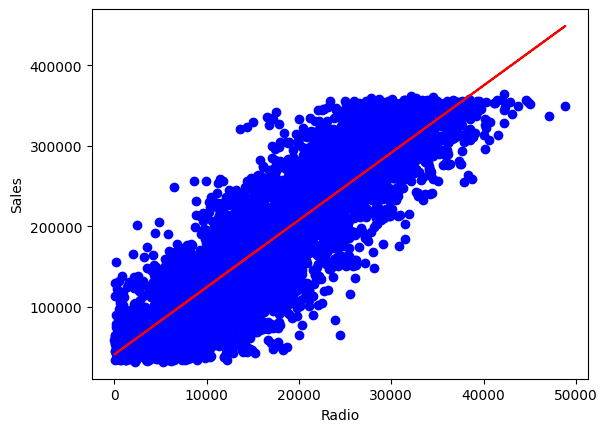

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color = "blue")
plt.plot(x, predictions, color = "red")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

4. Fit and predict for regression
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset.
Create x, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
Instantiate a linear regression model.
Fit the model to the training data (70% for train).
• Create y pred, making predictions for sales using the test features.

In [28]:
#Create x, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
x = sales_df
y = sales_df["sales"].values
#Instantiate a linear regression model.
model = LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [30]:
x = pd.get_dummies(sales_df)
y = sales_df['sales'].values
x =x.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
#Create y pred, 
y_pred = model.predict(x_test)
#making predictions for sales using the test features.
print(y_pred)

[ 55261.28  67574.9  272250.11 ...  53900.32 127225.8  145708.6 ]


5. Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.
Import mean_squared_error.
Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
Calculate the model's root mean squared error using y_test and y_pred.
Print r squared and rmse.

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate R-squared score
r_squared = model.score(x_test, y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-squared:', r_squared)
print('Root Mean Square Error:', rmse)

R-squared: 1.0
Root Mean Square Error: 1.370260071486389e-10


In [32]:
r_squared = model.score(x_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R-squared:', r_squared)
print('Root Mean Square Error:', rmse)

R-squared: 1.0
Root Mean Square Error: 1.370260071486389e-10


6. Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.
Import KFold and cross_val_score.
Create kf by calling KFold (), setting the number of splits to six, shuffle to True, and setting a seed of 5.
Perform cross-validation using reg on x and y, passing kf to cv.
Print the cv scores.

In [33]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(model, x, y, cv=kf)
print(cv_scores)

[1. 1. 1. 1. 1. 1.]


7. Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.
You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.
Calculate and print the mean of the results.
Calculate and print the standard deviation of cv_results.
Display the 95% confidence interval for your results using np.quantile().

In [35]:
mean_cv_scores = np.mean(cv_scores)
print('mean of cv_scores: ', mean_cv_scores)
std_cv_scores = np.std(cv_scores)
print('standard deviation of cv_scores:',std_cv_scores)
confidene_interval = np.quantile(cv_scores, [0.025, 0.975])
print('95% confidence interval:', confidene_interval)

mean of cv_scores:  1.0
standard deviation of cv_scores: 0.0
95% confidence interval: [1. 1.]


8. Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.
In this exercise, you will fit ridge regression models over a range of different alpha values, and print their R2 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into x_train, X_test, y_train, y_test for you.
alphas
[0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
· Import Ridge.
Instantiate Ridge, setting alpha equal to alpha.
Fit the model to the training data.
Calculate the R2 score for each iteration of ridge.

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
#Define alphas
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
#Interate over alphas
for alpha in alphas:
    #Khởi tạo và điều chỉnh mô hình hồi quy Ridge
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    #Dự đoán doanh số bán hàng bằng test features
    y_pred = model.predict(x_test)
    #Tính R-squared score
    r2 = r2_score(y_test, y_pred)
    print('Alpha:', alpha)
    print('R-squared:', r2)

Alpha: 0.1
R-squared: 1.0
Alpha: 1.0
R-squared: 1.0
Alpha: 10.0
R-squared: 1.0
Alpha: 100.0
R-squared: 1.0
Alpha: 1000.0
R-squared: 1.0
Alpha: 10000.0
R-squared: 0.9999999999999999


9. Lasso regression for feature importance
In the video, you saw how lasso regression can be used to identify important features in a dataset.
In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficient
Import Lasso from sklearn.linear_model.
Instantiate a Lasso regressor with an alpha of 0.3.
Fit the model to the data.
Compute the model's coefficients, storing as lasso_coef.

In [37]:
from sklearn.linear_model import Lasso
#Khởi tạo một bộ hồi quy Lasso với hệ số alpha là 0,3.
model = Lasso(alpha=0.3)
#Điều chỉnh mô hình cho phù hợp với dữ liệu.
model.fit(x_train, y_train)
#Tính toán các hệ số của mô hình, lưu dưới dạng lasso_coef.
lasso_coef = model.coef_
print(lasso_coef)

[ 1.29229684e+00  1.16432007e-03 -1.06506146e-02  6.37659388e-01
  1.53510031e+01  3.34012264e+01 -4.60507400e+00 -7.96894604e+00]


In [38]:
import pandas as pd
sales_df = pd.read_csv(".//advertising_and_sales_clean.csv")
sales_df.head()
x = sales_df["radio"].values
y = sales_df["sales"].values
#Reshape x into a two-dimensional NumPy array
x = x.reshape(-1,1)
print(x.shape, y.shape)

(4546, 1) (4546,)


In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Dự đoán giá trị bán hàng bằng cách sử dụng x, lưu trữ as predictions
model.fit(x, y)
predictions = model.predict(x)
print(predictions)

[ 95491.17119147 117829.51038393 173423.38071499 ... 206147.61403088
 187204.93183873 174094.31771993]


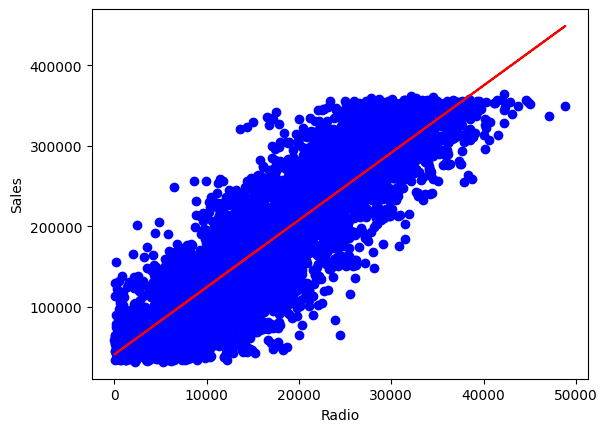

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color = "blue")
plt.plot(x, predictions, color = "red")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
#Tạo x, một mảng chứa các giá trị của tất cả features trong sales_df và y, chứa tất cả các giá trị từ cột "sales".
x = pd.get_dummies(sales_df.drop(columns=['sales'])).values
y = sales_df['sales'].values
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#Khởi tạo mô hình hồi quy tuyến tính.
model = LinearRegression()
model.fit(x_train, y_train)
#Dự đoán
y_pred = model.predict(x_test)
print(y_pred)

[ 53135.43066453  71060.6004603  266994.73045288 ...  53251.38331751
 124551.039661   138673.61033796]


In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np
#Tính R-squared score
r_squared = model.score(x_test, y_test)
#Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R-squared:', r_squared)
print('Root Mean Square Error:', rmse)

R-squared: 0.9990150033349248
Root Mean Square Error: 2944.742849931021


In [43]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
#Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()
#Khởi tạo KFold với 6 phần chia, xáo trộn, và random_state = 5
kf = KFold(n_splits=6, shuffle=True, random_state=5)
#Tính toán điểm cross-validation
cv_scores = cross_val_score(model, x, y, cv=kf)
print(cv_scores)

[0.99893896 0.99909078 0.99900929 0.99896318 0.99889195 0.99903855]


In [44]:
import numpy as np

# Calculate and print the mean of the results
mean_cv_scores = np.mean(cv_scores)
print('Mean of CV scores:', mean_cv_scores)

# Calculate and print the standard deviation of cv_scores
std_cv_scores = np.std(cv_scores)
print('Standard deviation of CV scores:', std_cv_scores)

# Display the 95% confidence interval for your results
confidence_interval = np.quantile(cv_scores, [0.025, 0.975])
print('95% confidence interval:', confidence_interval)

Mean of CV scores: 0.9989887858587477
Standard deviation of CV scores: 6.559306063470636e-05
95% confidence interval: [0.99889783 0.99908425]


In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
#Define alphas
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
#Interate over alphas
for alpha in alphas:
    #Khởi tạo và điều chỉnh mô hình hồi quy Ridge
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    #Dự đoán doanh số bán hàng bằng test features
    y_pred = model.predict(x_test)
    #Tính R-squared score
    r2 = r2_score(y_test, y_pred)
    print('Alpha:', alpha)
    print('R-squared:', r2)


Alpha: 0.1
R-squared: 0.9990150033934493
Alpha: 1.0
R-squared: 0.9990150039191462
Alpha: 10.0
R-squared: 0.9990150090764298
Alpha: 100.0
R-squared: 0.9990150521414333
Alpha: 1000.0
R-squared: 0.999015182881188
Alpha: 10000.0
R-squared: 0.9990152130441597


In [46]:
from sklearn.linear_model import Lasso
#Khởi tạo một bộ hồi quy Lasso với hệ số alpha là 0,3.
model = Lasso(alpha=0.3)
#Điều chỉnh mô hình cho phù hợp với dữ liệu.
model.fit(x_train, y_train)
#Tính toán các hệ số của mô hình, lưu dưới dạng lasso_coef.
lasso_coef = model.coef_
print(lasso_coef)

[ 3.56290516e+00  3.18888905e-03 -2.93285644e-02  5.26302270e+01
  9.19099313e+01 -1.10062187e+01 -2.30460989e+01]
